# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

#### Import and set magics 

In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code

from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm 
import pickle

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Question 1

We illustrate how $H_F/H_M$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma$ = {0.5, 1.0, 1.5} by firstly solving the model discretely. This is done by calling the model from the 'py' file and assigning values to alpha and sigma. 

In [3]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Create empty arrays to store the results for each combination of alpha and sigma
HF_values = np.zeros((len(alpha_values), len(sigma_values)))
HM_values = np.zeros((len(alpha_values), len(sigma_values)))
HF_HM_ratios = np.zeros((len(alpha_values), len(sigma_values)))

# Solve the model for each combination of parameters and store the results
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma
        result = model.solve_discrete()
        HF_values[i,j] = result.HF
        HM_values[i,j] = result.HM
        HF_HM_ratios[i,j] = result.HF / result.HM
        
# Save the results arrays using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump((alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results.pkl', 'rb') as f:
    alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/miehustad/Desktop/IntroProg/projects-2023-team-norway/inauguralproject/inauguralproject.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1 - par.alpha )*HM**((par.sigma - 1)/par.sigma) + par.alpha * HF**((par.sigma - 1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/miehustad/Desktop/IntroProg/projects-2023-team-norway/inauguralproject/inauguralproject.py:64: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1 - par.alpha )*HM**((par.sigma - 1)/par.sigma) + par.alpha * HF**((par.sigma - 1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/miehustad/Desktop/IntroProg/projects-2023-team-norway/inauguralproject/inauguralproject.py:68: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


After finding the optimal values we plot a three dimensional plot in order to caputure all the effects. 

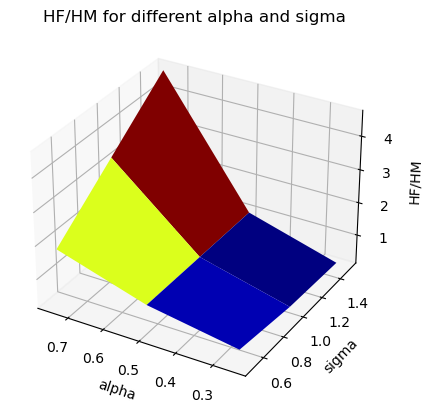

In [4]:
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
#ax.plot_surface(alpha_values,sigma_values,HF_HM_ratios,cmap=cm.jet)
ax.plot_surface(alpha,sigma,HF_HM_ratios,cmap=cm.jet)

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# c. invert xaxis
ax.invert_xaxis()

# d. add title
ax.set_title('HF/HM for different alpha and sigma')

# e. display the plot
plt.show()

We observe that with increasing alpha and sigma the female home production relative to male home production increases.  Alpha is the female productivity in home production. When alpha increases, the female is more productive in home production, and therefore the amount of home production she makes is larger. As sigma represents the elasticity of substitution we see that when it increases, alongside an increase in alpha, it gets more costly to substitute female home production for male home production as the female is more productive.

# Question 2

We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$ using the results from question 1 but changing the female wage to differnt values to see how the agents changes their optimal solution when faced with different scenarios. As the plot shows ** fyll inn

In [5]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solve the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_discrete()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)


Then we plot the arrays against each other. 

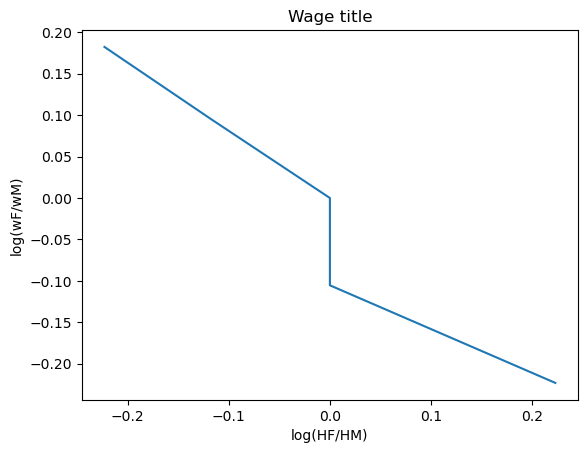

In [6]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot arr1 against arr2
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Wage title')

# Display the plot
plt.show()


When female wages increase compared to the male wage, female home produciton decreases. To elaborate, wage equality also lead to equality in home prodution, whereas wage inequality leads to more disparaties in home produciton. We can observe that when female wages are higher than the male wages, the decreasing female home production is deminishing. 

# Question 3

Updated assumption: The choice of working hours is continous i.e. $L_M$, $L_F$, $H_M$, $H_F$ $\in$ [0,24]. 


In [7]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the vector for female wage
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solve the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_continuous()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/miehustad/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$.

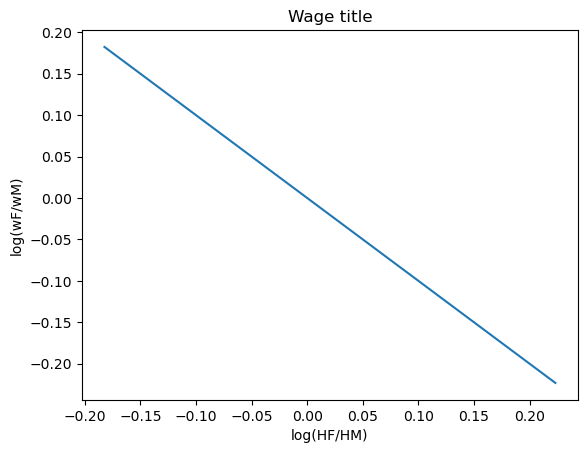

In [8]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot arr1 against arr2
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Wage title')

# Display the plot
plt.show()

Compared to the plot in question 2 we see that the line is now straight as the optimal solutions are continous. The same effect is captured here as a higher female wage leads her to having less home production relative to the male. 

# Question 4

We firstly use the optimal solution obtained in question 3, the HF and HM values, in order to replicate the regression conducted by Siminiski and Yetsenga. Then we find the optimal values for $\alpha$ and $\sigma$ in order to minimize the squared errors between $\beta_0$ and $\hat{\beta}_0$ and $\beta_1$ and $\hat{\beta}_1$. In order words so that $(\beta_0-\hat{\beta}_0)^2 + (\beta_1-\hat{\beta}_1)^2$ is minimized. 


In [9]:
model.sol.HM_vec = np.asarray(HM_values)
model.sol.HF_vec = np.asarray(HF_values)
reg = model.run3_regression()
print(reg)

HM_vec: [4.09256025 4.27104739 4.45449074 4.6420016  4.83262967]
HF_vec: [5.11561184 4.74567029 4.4545075  4.21994127 4.02719881]
x: [-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
y: [ 2.23126258e-01  1.05373596e-01  3.76349561e-06 -9.53244408e-02
 -1.82319716e-01]
A: [[ 1.         -0.22314355]
 [ 1.         -0.10536052]
 [ 1.          0.        ]
 [ 1.          0.09531018]
 [ 1.          0.18232156]]
b0: -2.4426029762486994e-06
b1: -0.9999870864642447
(-2.4426029762486994e-06, -0.9999870864642447)
